# 상관관계

Last updated 20191029TUE0000

목차
* S.2 문제
* S.3 그래프
* S.4 상관관계 계산
* S.4.1 상관관계 식
* S.4.2 데이터
* S.4.3 평균 계산
* S.4.4 분산 계산
* S.4.5 numpy 공분산 계산
* S.4.6 sklearn
* S.4.7 zscore를 이용한 상관관계
* S.5 함수로 만들어 보기
* S.6 상관관계 표
* S.7 Iris


## S.2 문제

상관관계는 변수 간에 서로 어떤 관계가 있는지, 그 변화의 **방향**, **강도**를 나타낸다.
연속 변수들이 서로 커지거나 작아지거나 하는 의미를 관계를 표현한다.
**명목변수**와의 상관관계는 의미가 없다.

단, 서로 상관관계가 있다고 해서 인과관계가 있다는 의미는 아니다.
키와 몸무게가 서로 상관관계가 있다고 하자.
키가 원인이 되어서 몸무게가 결과로 올라간다고 가정해서는 안된다는 것이다.

**맥주**와 **선풍기**의 매출은 서로 상관관계가 있다.
그렇다고 해서 선풍기의 매출이 원인이 되어 맥주의 매출을 올린 것은 아니다.
더워져서 선풍기와 맥주의 매출이 올라간 것으로 이해해야 한다.
또 **교통상황**과 **약속지체**는 상관관계가 있다.
교통이 막히면 약속이 늦어지는 것은 맞다.
그렇다고 해서 약속이 늦어진다고 교통이 막히는 것은 아니다.


### 상관관계 방향과 강도

* $+$ 변수가 서로 같은 방향으로 변동, 숫자가 클수록 강도가 크며 반대로 적을수록 적다.
* 0 변수가 서로 영향을 주지 않음
* $-$ 변수가 서로 다른 방향으로 변동

## S.3 그래프

변수들의 상관관계를 살펴보기 위해 그래프를 그려보자.
우선 임의로 (x1,y1), (x2,y2) 데이터를 생성하고 그래프를 배치해서 그려본다.
```matplotlib``` 라이브러리를 사용하기 위하여
```%mathplotlib inline```는 노트북에서 그래프를 바로 아래 출력창에 띄운다. 이 명령어가 없으면 별도의 창을 열어서 띄우게 된다.
```title()```은 제목을 적는 함수이고, 유니코드 지원이 되지 않아서 제목에 한글을 쓸 수는 없다. 
```ylabel()```은 y축 명을 적는 기능이다.

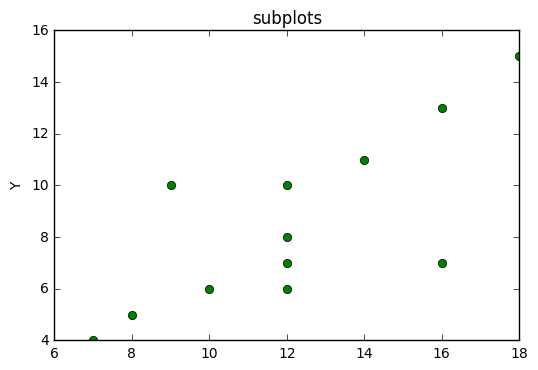

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt

X=[10,7,12,12,9,16,12,18,8,12,14,16]
Y=[6,4,7,8,10,7,10,15,5,6,11,13]

plt.plot(X, Y, 'go')
plt.title('subplots')
plt.ylabel('Y')

plt.show()


```subplots()``` 명령어는 그림 갯수를 인자로 받는다.
행, 열로 인자를 넣으면 격자로 그림을 배치하게 된다. 예를 들어, 인자 ```1,2```는 1행과 2열을 의미한다.
이 명령어는 Figure와 Axes를 반환해서, 그림의 설정을 변경할 수 있다.
```set_minor_locator()```는 작은 구분자를 설정할 수 있고, ```AutoMinorLocator(5)``` 구분자의 갯수를 정한다. 큰 구분자 사이에 4개를 넣으라는 의미이다.
아래 '3'은 구분자 3개를 넣게 된다.

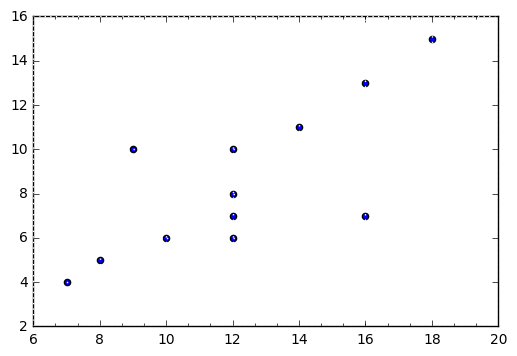

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.scatter(X, Y)
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(1))
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
#fig.show()

## S.4 상관관계 계산

### S.4.1 상관관계 식

상관관계는 공분산 covariance를 표준편차의 곱으로 나눈 값으로 계산한다.

Correlation(r) =[ NΣXY - (ΣX)(ΣY) / Sqrt([NΣX2 - (ΣX)2][NΣY2 - (ΣY)2])] 

$$
r_{(x,y)} = \frac {cov(x,y)} {s_x s_y}
$$

$$
cov(x,y)=\frac{ \sum\limits_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y} ) }
                       {n-1}
$$

### S.4.2 데이터

임의로 X, Y 데이터를 생성해보자

In [2]:
X=[2.1,2.5,4.0,3.6]
Y=[8,12,14,10]

X=[10,7,12,12,9,16,12,18,8,12,14,16]
Y=[6,4,7,8,10,7,10,15,5,6,11,13]

### S.4.3 평균 계산

공분산을 구하려면 평균 xbar, ybar를 먼저 구해야 한다.

In [3]:
import numpy as np

xbar=np.mean(X)
ybar=np.mean(Y)

print "numpy mean of X=",xbar
print "simple mean of X=", float(sum(X))/len(X)


numpy mean of X= 12.1666666667
simple mean of X= 12.1666666667


### S.4.4 분산 계산

분산은 데이터가 얼마나 흩어져 분포되었는지 보여준다.
* 주의: ddof는 Delta Degrees of Freedom. 기본 값은 ddof=0이지만, 1로 해서 계산함.
* 무작위로 x값을 고르게 되는 경우, n-1로 나누어주어 보정해주어야 함.


In [4]:
print(np.var(X))
print(np.std(X)) # ddof=0
print(np.std(X, ddof=1))

10.4722222222
3.23608130649
3.3799766899


수식으로 계산을 해보자.

In [9]:
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/len(X))) # ddof=0
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/(len(X)-1))) # ddof=1

3.3799766899
3.23608130649


표준편차는 variance의 제곱근으로 계산한다.

In [15]:
sx=np.sqrt(np.var(X,ddof=1))
sy=np.sqrt(np.var(Y,ddof=1))
print("sx:",sx, "sy:",sy)

3.3799766899
('sx:', 3.3799766898963113, 'sy:', 3.3439225741362764)


### S.4.5 numpy 공분산 계산

공분산은 계산하면 2 x 2 값을 출력한다.

공분산의 부호는 두 변수가 같은 방향, 다른 방향으로 움직이는지 보여준다.
공분산이 '0'이라면 두 변수가 독립적이란 의미이다.
크기는 해석하기 어렵다.

대각선으로 하나는 x에 대해 ```sum( (x-mean(x))**2) / (n-1)```, 다른 값은 y를 대입해서 계산할 수 있다.
다른 대각선은 ```sum( (x-mean(x))(y-mean(y)) ) / (n-1)```을 의미한다.

In [27]:
print np.sum( (X-np.mean(X))**2) / (len(X)-1)
print np.sum( (Y-np.mean(Y))**2) / (len(Y)-1)
print np.sum( (X-np.mean(X))*(Y-np.mean(Y)) ) / (len(X)-1)

11.4242424242
11.1818181818
8.45454545455


In [28]:
covxy=sum( [ (x-xbar)*(y-ybar) for x,y in zip(X,Y) ]) / (len(X)-1)
print "np cov=",np.cov(X,Y)

print "simple cov=",covxy
print "npcov of X", np.cov(X) #sum( [ (x-xbar)**2 for x in X ])/(len(X)-1)
print "npcov of Y", np.cov(Y)

np cov= [[ 11.42424242   8.45454545]
 [  8.45454545  11.18181818]]
simple cov= 8.45454545455
npcov of X 11.4242424242
npcov of Y 11.1818181818


In [29]:
print(np.var(X, ddof=1))

11.4242424242


상관관계는 공분산을 표준편차의 곱으로 나누어서 계산한다.

In [68]:
rxy=covxy/(sx*sy)
print "corr: ",rxy

corr:  0.748032289676


In [122]:
import math
numer = sum ( [ x*y for x,y in zip(X,Y) ] ) - len(X) * (xbar * ybar)
denom = math.sqrt( (sum( [ x*x for x in X ]) - len(X) * xbar**2) * ( sum( [ y * y for y in Y ]) -len(X) * ybar**2))
print(numer/denom)

0.748032289676


### S.4.6 sklearn

numpy계산과 맞추어 보자.


In [32]:
import scipy.stats as stats
print stats.pearsonr(X,Y)
#(0.66257388220302893, 0.33742611779697101)

(0.74803228967631841, 0.0051443764140137417)


In [33]:
# zscore로 구한 값과 비교
print sum(stats.zscore(X)*stats.zscore(Y))/len(X)

0.748032289676


### S.4.7 zscore를 이용한 상관관계

상관관계는 $$ \sum \frac{z_x . z_y} {N} $$
N은 x,y가 쌍이므로 어느 한 변수의 size를 택해도 같다.

negative란 한 변수가 높을 때 (postive z score) 다른 변수가 낮은 값 (negative z
score)을 갖는 것으로 곱하면 음수가 되게 된다.

* 인과관계를 내포하고 있기는 하지만, 인과관계는 아니다.
담배와 암의 상관관계의 상관관계 높다. 그리고 담배가 암을 유발하는 관계. 그러나
이러한 방향을 말해주는 것은 아니다.
* 선형

어떤 경우에 유의미적?

In [57]:
### correlation from zscores
sum ( [ ( (x-np.mean(X))/np.std(X) ) * ( (y-np.mean(Y))/np.std(Y) ) for x,y in zip(X,Y) ] )

8.9763874761158196

In [58]:
sum (stats.zscore(X) * stats.zscore(Y))
sum (stats.zscore(X) * stats.zscore(Y))/len(X)

0.7480322896763183

## S.5 함수로 만들어 보기

위를 함수로 만들어 보자
우선 for-loop의 특징에 대해 배우자.

In [121]:
import math
numer = sum ( [ x*y for x,y in zip(X,Y) ] ) - len(X) * (xbar * ybar)
denom = math.sqrt( (sum( [ x*x for x in X ]) - len(X) * xbar**2) * ( sum( [ y * y for y in Y ]) -len(X) * ybar**2))
print(numer,denom, numer/denom)

(93.0, 124.32618388738557, 0.74803228967631819)


In [125]:
numer=np.sum(np.array(X)*np.array(Y)) - len(X)*np.mean(X)*np.mean(Y)
denom1=np.sum(np.array(X)*np.array(X)) - len(X)*np.power(np.mean(X),2)
denom2=np.sum(np.array(Y)*np.array(Y)) - len(Y)*np.power(np.mean(Y),2)
denom=np.sqrt(denom1*denom2)
print(numer,denom,numer/denom)

(93.0, 124.32618388738557, 0.74803228967631819)


In [134]:
def pearson(X,Y):
    numer=np.sum(np.array(X)*np.array(Y)) - len(X)*np.mean(X)*np.mean(Y)
    denom1=np.sum(np.array(X)*np.array(X)) - len(X)*np.power(np.mean(X),2)
    denom2=np.sum(np.array(Y)*np.array(Y)) - len(Y)*np.power(np.mean(Y),2)
    denom=np.sqrt(denom1*denom2)
    #print(numer,denom,numer/denom)
    r=1 if denom==0 else numer/denom
    return r

In [135]:
pearson(X,Y)

0.74803228967631819

## S.6 상관관계 표

Using numpy, you could use np.corrcoef:

In [44]:
import numpy as np

a=np.array([0.1, .32, .2, 0.4, 0.8])
b=np.array([.23, .18, .56, .61, .12])
c=np.array([.9, .3, .6, .5, .3])
d=np.array([.34, .75, .91, .19, .21])
            

a,b는 -0.352, a,c는 -0.747, a,d는 -0.489
b,c는 0.238 등 열과 행으로 각 변수의 상관관계 표를 읽을 수 있다.

In [45]:
np.corrcoef([a,b,c,d])

array([[ 1.        , -0.35153114, -0.74736506, -0.48917666],
       [-0.35153114,  1.        ,  0.23810227,  0.15958285],
       [-0.74736506,  0.23810227,  1.        , -0.03960706],
       [-0.48917666,  0.15958285, -0.03960706,  1.        ]])

### scipy.stats



In [ ]:
xx=np.random.normal(0,1,100)
yy=np.random.normal(0,1,100)

Pearson 상관관계는 두 변수의 선형관계를 측정한다.
두 변수는 정규분포를 따르는 것으로 가정한다.
앞은 상관관계를 말하고, 그 다음 값은 p-value이다.

In [36]:
print stats.pearsonr(xx,yy)

(-0.014953544678355404, 0.88260821551981983)


비모수추정 상관관계를 말한다. 두 변수가 정규분포를 따르지 않는 경우에 사용한다.

In [37]:
stats.spearmanr(xx,yy)

SpearmanrResult(correlation=-0.013321332133213319, pvalue=0.89534472782901031)

등위에 의한 상관관계를 계산한다.
1938년 이를 개발한 Maurice Kendall의 이름을 따서 붙였다.

In [38]:
stats.kendalltau(xx,yy)

KendalltauResult(correlation=-0.0068686868686868739, pvalue=0.91934726886031781)

In [39]:
x = [5.05, 6.75, 3.21, 2.66]
y = [1.65, 26.5, -5.93, 7.96]
z = [1.65, 2.64, 2.64, 6.95]

In [40]:
stats.spearmanr(x,y)
#(0.39999999999999997, 0.59999999999999998)

SpearmanrResult(correlation=0.39999999999999997, pvalue=0.59999999999999998)

In [41]:
stats.spearmanr(x,z)
#(-0.63245553203367588, 0.36754446796632423)

SpearmanrResult(correlation=-0.63245553203367599, pvalue=0.36754446796632401)

In [42]:
stats.kendalltau(x,y)
#(0.33333333333333331, 0.49690585901477358)

KendalltauResult(correlation=0.33333333333333331, pvalue=0.49690585901477358)

In [43]:
stats.kendalltau(x,z)
#(-0.54772255750516619, 0.26428835793500238)

KendalltauResult(correlation=-0.54772255750516619, pvalue=0.26428835793500238)

## S.7 Iris

두 변수의 공분산을 표준편차로 나눈 값
the covariance of the two variables divided by the product of their standard deviations.

standardize 표준화란 각 점수를 평균에서 빼고난 후 표준편차로 나누는 것.

$$
   r = \frac{\sum\limits_{i=1}^n (X_i - \bar{X})(Y_i -
   \bar{Y})}{\sqrt{\sum\limits_{i=1}^n (X_i - \bar{X})^2} \sqrt{\sum
   \limits_{i=1}^n (Y_i - \bar{Y})^2}}
$$

## 데이터

Iris 데이터
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [29]:
import pandas as pd

file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

In [30]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
iris1 = sns.load_dataset("iris")
iris1.head()
iris1.count()
iris1.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## statsmodels

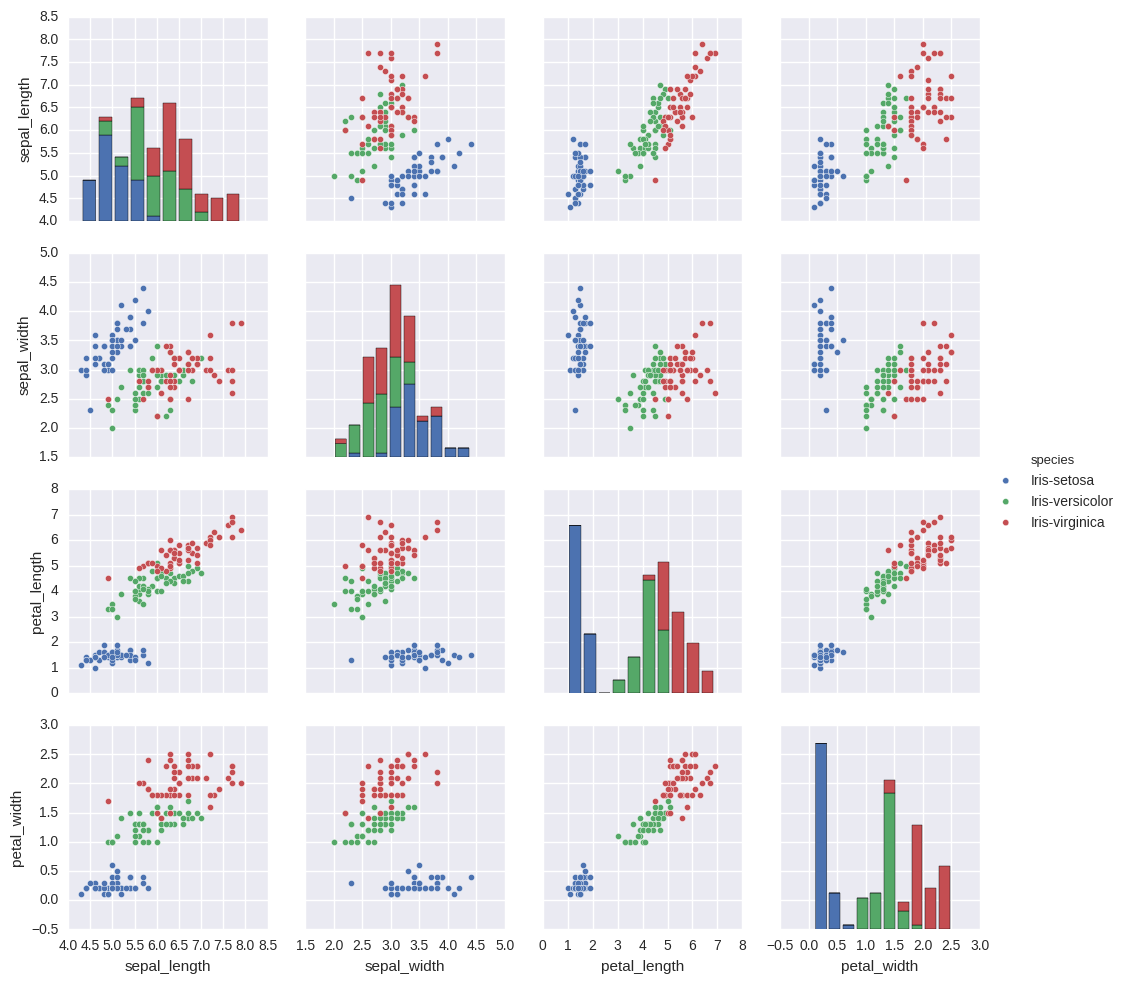

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#without regression
sns.pairplot(aa, kind="scatter", hue="species")
plt.show()

## spark

In [138]:
import os
import sys 
os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [139]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### 상관관계

* 무작위 수 2 컬럼을 만들어, 상관관계를 계산한다.
* 자신과의 상관관계는 당연히 1.0이 된다.
* spark의 ```rand()``` 함수는 ```pyspark.sql.functions``` 모듈에서 제공된다.

In [142]:
from pyspark.sql.functions import rand
df = spark.range(0, 10).withColumn('rand1', rand(seed=10)).withColumn('rand2', rand(seed=27))
print df.stat.corr('rand1', 'rand2')
print df.stat.corr('id', 'id')

0.308427454327
1.0


Pearson’s Correlation - 정규분포인 경우
Spearman’s Correlation - 정규분포가 아닌 경우

In [ ]:
from pyspark.mllib.stat import Statistics
corr_mat=Statistics.corr(features, method="pearson")

In [ ]:
corr_mat=Statistics.corr(features, method="spearman")